In [234]:
import numpy as np
import matplotlib.pyplot as plt

# os.chdir("/Users/matmatius/Documents/project1")
#from imp import reload



# matrix creation


# generate plane

#np.random.seed(1);matrix=np.random.rand(3,3)


def readMax(matrix):
    x,y=1,1
    mValue=matrix[1][1]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j]>= mValue:
                x=i
                y=j
                mValue=matrix[i][j]
    return x,y,mValue
                
def readMax1(matrix):
    indices = np.where(matrix == matrix.max())
    return int(indices[0]),int(indices[1]),matrix[int(indices[0]),int(indices[1])]


def robotSearch(factory,rx,ry,position):
    trials=10000
    while trials>=0:
        trials=trials-1
        mx,my,mValue=readMax1(factory[rx-1:rx+2,ry-1:ry+2])
        if mx==1 and my==1:
            trials=-1
        else:
            rx=rx-1+mx
            ry=ry-1+my 
            position[rx,ry]=1
    return rx, ry, mValue, position

#plot matrix
#plt.imshow(matrix);
#plt.colorbar()
#plt.show()


                    
                
    

In [152]:
matrix=np.zeros((15,15))

In [154]:
matrix[4:8,5:12]=np.random.rand(4,7)

In [155]:
robotSearch(matrix,6,8)

(6, 8, 0.979815187913649)

In [156]:
readMax1(matrix)

(6, 8, 0.979815187913649)

In [157]:
robotSearch(matrix,7,9)

(6, 8, 0.979815187913649)

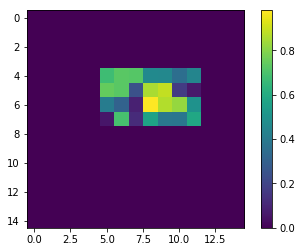

In [158]:
plt.imshow(matrix);
plt.colorbar()
plt.show()

In [235]:
def patrol(factory):
    n1=len(factory)
    n2=len(factory[0])
    position=np.zeros((n1,n2))
    flag=False
    moveflag=True
    for rx in range(1,len(factory)-1):
        if flag== False:
            if moveflag== True:
                moveflag=False
                for ry in range(1,len(factory[0])-1):
                    position[rx,ry]=1
                    if np.max(factory[rx-1:rx+2,ry-1:ry+2])>0:
                        (x,y,z,position)=robotSearch(factory,rx,ry,position)
                        flag=True
                        break
            else:
                moveflag=True
                for ry in range(len(factory[0])-1,1,-1):
                    position[rx,ry]=1
                    if np.max(factory[rx-1:rx+2,ry-1:ry+2])>0:
                        (x,y,z,position)=robotSearch(factory,rx,ry,position)
                        flag=True
                        break
        else:
            break
        
    if flag:
        print('Leak found at: ',x,y, 'with value:', factory[x,y])
    else:
        print('No leaks were found')
    plt.imshow(position);
    plt.colorbar()
    plt.show()
            
            

In [132]:
max(matrix[:,11])

0.5605353116967995

In [160]:
patrol(matrix)

Leak found at:  5 5 with value: 0.7492449662013011


In [161]:
np.max(matrix)

0.979815187913649

In [162]:
matrix[5,5]

0.7492449662013011

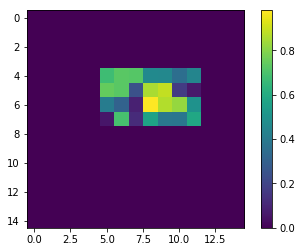

In [163]:
plt.imshow(matrix);
plt.colorbar()
plt.show()

In [175]:
factory=np.zeros((20,20))

In [176]:
patrol(factory)

No leaks were found


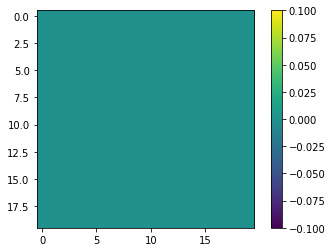

In [177]:
plt.imshow(factory);
plt.colorbar()
plt.show()

In [178]:
factory[12:18,5:11]=np.random.rand(6,6)

In [179]:
patrol(factory)

Leak found at:  13 7 with value: 0.8172713260261156


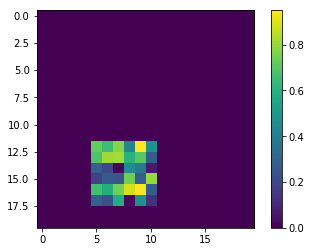

In [182]:
plt.imshow(factory);
plt.colorbar()
plt.show()

In [183]:
factory1=np.array([[8.521678984586967e-193, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.7471574041477082e-53, 2.1273029748731813e-85, 1.6549748007594145e-267, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.3688165713288275e-23, 3.6682649373556974e-26, 1.13800149919875e-33, 4.062300688391953e-64, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.4865651470294533e-12, 6.31935304946132e-12, 3.3565334465019926e-11, 2.386069387327571e-10, 1.7737632440149852e-09, 1.4467502086982264e-14, 0.0, 0.0, 0.0, 0.0, 0.0], [5.215259863410235e-08, 6.107114001899967e-07, 1.1238404485053402e-05, 0.0003646591067681937, 0.019046572730760613, 0.1236443262620386, 4.8746790478213e-31, 0.0, 0.0, 0.0, 0.0], [7.661859242338006e-06, 6.365344721498147e-05, 0.000582827971811102, 0.00484480881510389, 0.018955876252936543, 0.002961670925135358, 7.759091988141583e-11, 4.512088779885663e-82, 0.0, 0.0, 0.0], [8.926116341851431e-05, 0.00042874737911758844, 0.0017737948289535206, 0.004774312823964054, 0.004323367719557073, 0.0002379580558287061, 4.300615912286253e-09, 1.8255415488041845e-26, 2.0036523879830194e-122, 0.0, 0.0], [0.0003044870348886665, 0.0008260360855703465, 0.0018047574922669867, 0.0022487364253965378, 0.0009208192721910004, 3.82389126764583e-05, 9.969986309289041e-09, 7.576600101527534e-18, 2.916379784660107e-44, 5.380406177296102e-154, 0.0], [0.0006111927958515529, 0.0009682628949280663, 0.0011571339832259979, 0.0008605057660847083, 0.00022640327121502014, 9.178234789408524e-06, 1.067862017348197e-08, 8.387999363463915e-15, 2.9241110422281306e-28, 2.0956093915533846e-62, 1.6373239112697905e-179], [0.0007978887889624207, 0.0009250482996291454, 0.0007264833911184803, 0.00031942004941802214, 6.53907390525706e-05, 2.847432361171306e-06, 8.766886267430948e-09, 2.240480986844112e-13, 4.929914722710573e-22, 1.4442883085517261e-39, 4.228051607164549e-80], [0.0008042135968559042, 0.0007286665030499536, 0.0004466064189049534, 0.00015405088508262473, 2.247001371628107e-05, 1.0543447571166064e-06, 6.4785569180653175e-09, 1.308007169814162e-12, 6.79899961432248e-19, 4.870441914118489e-30, 2.7321706895484013e-51]])

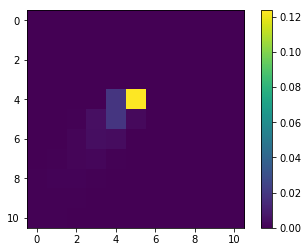

In [184]:
plt.imshow(factory1);
plt.colorbar()
plt.show()

In [193]:
factory2=np.zeros((50,50))

In [194]:
factory2[34:45,23:34]=factory1

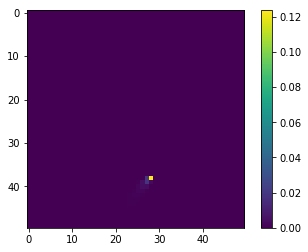

In [196]:
plt.imshow(factory2);
plt.colorbar()
plt.show()

In [199]:
patrol(factory2)

Leak found at:  38 28 with value: 0.1236443262620386


In [206]:
factory2[13:16,31:34]=np.random.rand(3,3)

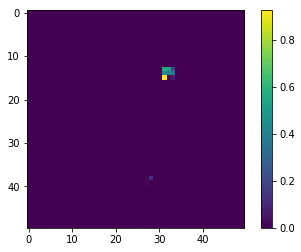

In [210]:
plt.imshow(factory2);
plt.colorbar()
plt.show()

In [208]:
patrol(factory2)

Leak found at:  13 31 with value: 0.5721877034647894


In [218]:
matrix.shape

(15, 15)

Leak found at:  13 31 with value: 0.5721877034647894


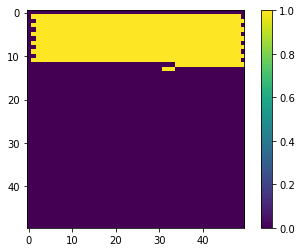

In [236]:
patrol(factory2)

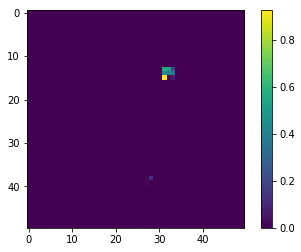

In [228]:
plt.imshow(factory2);
plt.colorbar()
plt.show()

In [237]:
factory3=np.zeros((50,50))

In [238]:
factory3[23:29,35:41]=np.random.rand(6,6)

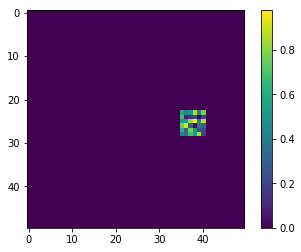

In [239]:
plt.imshow(factory3);
plt.colorbar()
plt.show()

Leak found at:  23 40 with value: 0.7765588423982638


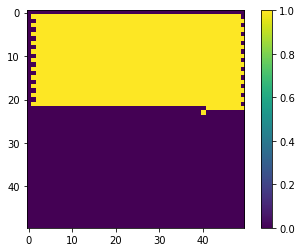

In [240]:
patrol(factory3)

In [241]:
readMax1(factory3)

(25, 38, 0.9774790484786454)

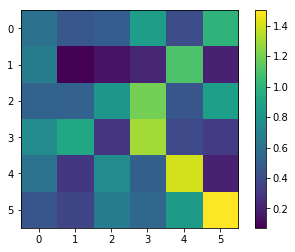

In [257]:
plt.imshow(factory3[23:29,35:41]);
plt.colorbar()
plt.show()

In [245]:
factory3[23:29,35:41].shape

(6, 6)

In [256]:
factory3[23:29,35:41][0,5]=1
factory3[23:29,35:41][1,4]=1.1
factory3[23:29,35:41][2,3]=1.2
factory3[23:29,35:41][3,3]=1.3
factory3[23:29,35:41][4,4]=1.4
factory3[23:29,35:41][5,5]=1.5

Leak found at:  28 40 with value: 1.5


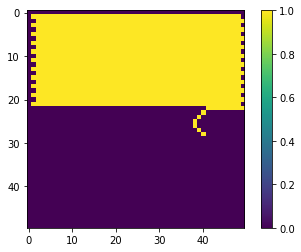

In [258]:
patrol(factory3)